In [524]:
##VERY IMPORTANT OR PLOTS FROM MATPLOT WILL NOT SHOW! IT TOOK AN HOUR FOR ME TO FIGURE THIS OUT!##
%matplotlib inline 
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config IPCompleter.greedy=True #Turn on AutoComplete
sns.set_style('whitegrid')

#######Temp
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier
###EndTemp

In [525]:
kobe_df = pd.read_csv("project2Data.csv")
#kobe_df = pd.read_csv("data.csv")

kobe_df.set_index('shot_id', inplace=True)
kobe_df["action_type"] = kobe_df["action_type"].astype('object')
kobe_df["combined_shot_type"] = kobe_df["combined_shot_type"].astype('category')
kobe_df["game_event_id"] = kobe_df["game_event_id"].astype('category')
kobe_df["game_id"] = kobe_df["game_id"].astype('category')
kobe_df["period"] = kobe_df["period"].astype('object')
kobe_df["playoffs"] = kobe_df["playoffs"].astype('category')
kobe_df["season"] = kobe_df["season"].astype('category')
kobe_df["shot_made_flag"] = kobe_df["shot_made_flag"].astype('category')
kobe_df["shot_type"] = kobe_df["shot_type"].astype('category')
kobe_df["team_id"] = kobe_df["team_id"].astype('category')

pd.set_option('display.max_columns', None) #Displays All the columns
print("Dataset has {} entries and {} features".format(*kobe_df.shape))

# preview data
kobe_df.head()

Dataset has 25697 entries and 28 features


,recId,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,attendance,arena_temp,avgnoisedb
shot_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,14707,69,94.06
3,2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,14707,69,94.06
4,3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,14707,69,94.06
5,4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,14707,69,94.06
6,5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,14707,69,94.06


In [526]:
pandas_profiling.ProfileReport(kobe_df)

Number of variables,29
Number of observations,25697
Total Missing (%),0.0%
Total size in memory,4.4 MiB
Average record size in memory,181.1 B
Numeric,11
Categorical,14
Boolean,0
Date,0
Text (Unique),0
Rejected,4


In [527]:
profile = pandas_profiling.ProfileReport(kobe_df)
profile.to_file(outputfile="data_analysis.html")

You can see a HTML version of the data located [here](data_analysis.html).

In [528]:
# check how many missing values each feature contains
kobe_df.isnull().sum(axis = 0)

recId                 0
action_type           0
combined_shot_type    0
game_event_id         0
game_id               0
lat                   0
loc_x                 0
loc_y                 0
lon                   0
minutes_remaining     0
period                0
playoffs              0
season                0
seconds_remaining     0
shot_distance         0
shot_made_flag        0
shot_type             0
shot_zone_area        0
shot_zone_basic       0
shot_zone_range       0
team_id               0
team_name             0
game_date             0
matchup               0
opponent              0
attendance            0
arena_temp            0
avgnoisedb            0
dtype: int64

## Detect and remove outliers

In [529]:
def detect_outliers(series, whis=1.5):
    q75, q25 = np.percentile(series, [75 ,25])
    iqr = q75 - q25
    return ~((series - series.median()).abs() <= (whis * iqr))

## For now - do not remove anything

In [530]:
pd.set_option('display.max_columns', None) #Displays All the columns
print("Dataset has {} entries and {} features".format(*kobe_df.shape))

# preview data
kobe_df.head()

Dataset has 25697 entries and 28 features


,recId,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,attendance,arena_temp,avgnoisedb
shot_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,14707,69,94.06
3,2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,14707,69,94.06
4,3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,14707,69,94.06
5,4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,14707,69,94.06
6,5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,14707,69,94.06


In [531]:
kobe_df.describe(include=['number'])

,recId,lat,loc_x,loc_y,lon,minutes_remaining,seconds_remaining,shot_distance,attendance,arena_temp,avgnoisedb
count,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000
mean,15326.181188,33.953043,7.148422,91.257345,-118.262652,4.886796,28.311554,13.457096,15040.683621,70.107717,94.951369
std,8860.246845,0.088152,110.073147,88.152106,0.110073,3.452475,17.523392,9.388725,1076.226662,2.030165,2.281707
min,1.000000,33.253300,-250.000000,-44.000000,-118.519800,0.000000,0.000000,0.000000,11065.000000,64.000000,88.560000
25%,7646.000000,33.884300,-67.000000,4.000000,-118.336800,2.000000,13.000000,5.000000,14314.000000,69.000000,93.400000
50%,15333.000000,33.970300,0.000000,74.000000,-118.269800,5.000000,28.000000,15.000000,15048.000000,70.000000,94.920000
75%,22973.000000,34.040300,94.000000,160.000000,-118.175800,8.000000,43.000000,21.000000,15738.000000,71.000000,96.490000
max,30692.000000,34.088300,248.000000,791.000000,-118.021800,11.000000,59.000000,79.000000,20845.000000,79.000000,102.430000


In [532]:
kobe_df.dtypes

recId                    int64
action_type             object
combined_shot_type    category
game_event_id         category
game_id               category
lat                    float64
loc_x                    int64
loc_y                    int64
lon                    float64
minutes_remaining        int64
period                  object
playoffs              category
season                category
seconds_remaining        int64
shot_distance            int64
shot_made_flag        category
shot_type             category
shot_zone_area          object
shot_zone_basic         object
shot_zone_range         object
team_id               category
team_name               object
game_date               object
matchup                 object
opponent                object
attendance               int64
arena_temp               int64
avgnoisedb             float64
dtype: object

# Data Visualization
See target class distribution

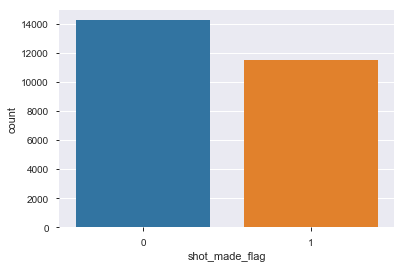

In [533]:
import seaborn as sns
%matplotlib inline
#sns.set(style="darkgrid")
#ax = plt.axes()
#sns.countplot(x='shot_made_flag', data=kobe_df, ax=ax);
#ax.set_title('Target class distribution')
#plt.show()

#kobe_df= sns.load_dataset("kobe_df")
ax = sns.countplot(x="shot_made_flag", data=kobe_df)
plt.show()

In [534]:
#f, axarr = plt.subplots(5, 2, figsize=(15, 15))
#
#sns.boxplot(x='lat', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[0,0])
#sns.boxplot(x='attendance', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[0, 1])
#sns.boxplot(x='loc_y', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[1, 0])
#sns.boxplot(x='loc_x', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[1, 1])
#sns.boxplot(x='minutes_remaining', y='shot_made_flag', showmeans=True, data=kobe_df, ax=axarr[2, 0])
#sns.boxplot(x='seconds_remaining', y='shot_made_flag', showmeans=True, data=kobe_df, ax=axarr[2, 1])
#sns.boxplot(x='shot_distance', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[3, 0])
#sns.boxplot(x='arena_temp', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[3, 1])
#sns.boxplot(x='avgnoisedb', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[4, 0])
#
#axarr[0, 0].set_title('Latitude')
#axarr[0, 1].set_title('attendance')
#axarr[1, 0].set_title('Loc y')
#axarr[1, 1].set_title('Loc x')
#axarr[2, 0].set_title('Minutes remaining')
#axarr[2, 1].set_title('Seconds remaining')
#axarr[3, 0].set_title('Shot distance')
#axarr[3, 1].set_title('Arena Temp')
#axarr[4, 0].set_title('Average DB')
#
#plt.tight_layout()
#plt.show()

In [535]:
#f, axarr = plt.subplots(8, figsize=(15, 25))
#
#sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=kobe_df, ax=axarr[0])
#sns.countplot(x="season", hue="shot_made_flag", data=kobe_df, ax=axarr[1])
#sns.countplot(x="period", hue="shot_made_flag", data=kobe_df, ax=axarr[2])
#sns.countplot(x="playoffs", hue="shot_made_flag", data=kobe_df, ax=axarr[3])
#sns.countplot(x="shot_type", hue="shot_made_flag", data=kobe_df, ax=axarr[4])
#sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=kobe_df, ax=axarr[5])
#sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=kobe_df, ax=axarr[6])
#sns.countplot(x="shot_zone_range", hue="shot_made_flag", data=kobe_df, ax=axarr[7])
#
#axarr[0].set_title('Combined shot type')
#axarr[1].set_title('Season')
#axarr[2].set_title('Period')
#axarr[3].set_title('Playoffs')
#axarr[4].set_title('Shot Type')
#axarr[5].set_title('Shot Zone Area')
#axarr[6].set_title('Shot Zone Basic')
#axarr[7].set_title('Shot Zone Range')
#
#plt.tight_layout()
#plt.show()

In [536]:
# Computing IQR
#Q1 = kobe_df['shot_distance'].quantile(0.25)
#Q3 = kobe_df['shot_distance'].quantile(0.75)
#IQR = Q3 - Q1
#IQR = Q3
#IQR
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
#filtered = kobe_df.query('(@Q1 - 1.5 * @IQR) <= shot_distance <= (@Q3 + 1.5 * @IQR)')
#filtered = kobe_df.query('shot_made_flag <= (@Q3 + 1.5 * @IQR)')
#filtered.describe(include=['number'])

In [537]:
#kobe_df.join(filtered, rsuffix='_filtered').boxplot()

In [538]:
kobe_df = kobe_df[(kobe_df['shot_distance'] < 26)]

In [539]:
kobe_df.describe(include=['number'])

,recId,lat,loc_x,loc_y,lon,minutes_remaining,seconds_remaining,shot_distance,attendance,arena_temp,avgnoisedb
count,23773.000000,23773.000000,23773.000000,23773.000000,23773.000000,23773.000000,23773.000000,23773.000000,23773.000000,23773.000000,23773.000000
mean,15304.461616,33.965380,8.233668,78.920077,-118.261566,4.998444,28.618138,12.271863,15043.374164,70.105540,94.957654
std,8905.194994,0.076896,106.986191,76.896120,0.106986,3.431225,17.408729,8.570269,1072.647784,2.028053,2.276758
min,1.000000,33.785300,-250.000000,-44.000000,-118.519800,0.000000,0.000000,0.000000,11065.000000,64.000000,88.560000
25%,7518.000000,33.901300,-59.000000,0.000000,-118.328800,2.000000,13.000000,4.000000,14333.000000,69.000000,93.400000
50%,15330.000000,33.983300,0.000000,61.000000,-118.269800,5.000000,29.000000,14.000000,15048.000000,70.000000,94.920000
75%,23037.000000,34.044300,91.000000,143.000000,-118.178800,8.000000,43.000000,19.000000,15738.000000,71.000000,96.490000
max,30692.000000,34.088300,248.000000,259.000000,-118.021800,11.000000,59.000000,25.000000,20845.000000,79.000000,102.430000


# 3. Prepare Data

In [540]:
#list(kobe_df)

In [541]:
unknown_mask = kobe_df['shot_made_flag'].isnull()
#print(unknown_mask.count)

## Data Cleaning
We are assuming an independence of each shot - therefore some columns might be dropped

In [542]:
target = kobe_df['shot_made_flag']

# Remove some columns
kobe_df.drop('team_id', axis=1, inplace=True) # Always one number
#data_cl.drop('lat', axis=1, inplace=True) # Correlated with loc_x
kobe_df.drop('lon', axis=1, inplace=True) # Correlated with loc_x
#kobe_df.drop('period', axis=1, inplace=True) # Highly Correlated with game_event_id
#kobe_df.drop('playoffs', axis=1, inplace=True) # Highly Correlated with game_id
kobe_df.drop('team_name', axis=1, inplace=True) # Always LA Lakers
kobe_df.drop('recId', axis=1, inplace=True) # Highly Correlated with shot_Id
#kobe_df.drop('shot_made_flag', axis=1, inplace=True)#Target

# Data Transformation
New features

In [543]:
# Remaining time
kobe_df['seconds_from_period_end'] = 60 * kobe_df['minutes_remaining'] + kobe_df['seconds_remaining']
kobe_df['last_5_sec_in_period'] = kobe_df['seconds_from_period_end'] < 5

kobe_df.drop('minutes_remaining', axis=1, inplace=True)
kobe_df.drop('seconds_remaining', axis=1, inplace=True)
kobe_df.drop('seconds_from_period_end', axis=1, inplace=True)

## Matchup - (away/home)
kobe_df['home_play'] = kobe_df['matchup'].str.contains('vs').astype('int')
kobe_df.drop('matchup', axis=1, inplace=True)

# Game date
kobe_df['game_date'] = pd.to_datetime(kobe_df['game_date'])
kobe_df['game_year'] = kobe_df['game_date'].dt.year
kobe_df['game_month'] = kobe_df['game_date'].dt.month
kobe_df.drop('game_date', axis=1, inplace=True)

# Loc_x, and loc_y binning
kobe_df['loc_x'] = pd.cut(kobe_df['loc_x'], 25)
kobe_df['loc_y'] = pd.cut(kobe_df['loc_y'], 25)

# Replace 20 least common action types with value 'Other'
rare_action_types = kobe_df['action_type'].value_counts().sort_values().index.values[:20]
kobe_df.loc[kobe_df['action_type'].isin(rare_action_types), 'action_type'] = 'Other'

## Encode categorical variables

In [544]:
categorial_cols = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_month', 'opponent', 'loc_x', 'loc_y']

for cc in categorial_cols:
    dummies = pd.get_dummies(kobe_df[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    kobe_df.drop(cc, axis=1, inplace=True)
    kobe_df = kobe_df.join(dummies)

In [545]:
kobe_df.head()

,game_event_id,game_id,lat,playoffs,shot_distance,shot_made_flag,attendance,arena_temp,avgnoisedb,last_5_sec_in_period,home_play,game_year,action_type#Alley Oop Dunk Shot,action_type#Alley Oop Layup shot,action_type#Driving Dunk Shot,action_type#Driving Finger Roll Layup Shot,action_type#Driving Finger Roll Shot,action_type#Driving Jump shot,action_type#Driving Layup Shot,action_type#Driving Reverse Layup Shot,action_type#Driving Slam Dunk Shot,action_type#Dunk Shot,action_type#Fadeaway Bank shot,action_type#Fadeaway Jump Shot,action_type#Finger Roll Layup Shot,action_type#Finger Roll Shot,action_type#Floating Jump shot,action_type#Hook Shot,action_type#Jump Bank Shot,action_type#Jump Hook Shot,action_type#Jump Shot,action_type#Layup Shot,action_type#Other,action_type#Pullup Jump shot,action_type#Reverse Dunk Shot,action_type#Reverse Layup Shot,action_type#Reverse Slam Dunk Shot,action_type#Running Bank shot,action_type#Running Dunk Shot,action_type#Running Hook Shot,action_type#Running Jump Shot,action_type#Running Layup Shot,action_type#Slam Dunk Shot,action_type#Step Back Jump shot,action_type#Tip Shot,action_type#Turnaround Bank shot,action_type#Turnaround Fadeaway shot,action_type#Turnaround Jump Shot,combined_shot_type#Bank Shot,combined_shot_type#Dunk,combined_shot_type#Hook Shot,combined_shot_type#Jump Shot,combined_shot_type#Layup,combined_shot_type#Tip Shot,period#1,period#2,period#3,period#4,period#5,period#6,period#7,season#1996-97,season#1997-98,season#1998-99,season#1999-00,season#2000-01,season#2001-02,season#2002-03,season#2003-04,season#2004-05,season#2005-06,season#2006-07,season#2007-08,season#2008-09,season#2009-10,season#2010-11,season#2011-12,season#2012-13,season#2013-14,season#2014-15,season#2015-16,shot_type#2PT Field Goal,shot_type#3PT Field Goal,shot_zone_area#Center(C),shot_zone_area#Left Side Center(LC),shot_zone_area#Left Side(L),shot_zone_area#Right Side Center(RC),shot_zone_area#Right Side(R),shot_zone_basic#Above the Break 3,shot_zone_basic#In The Paint (Non-RA),shot_zone_basic#Left Corner 3,shot_zone_basic#Mid-Range,shot_zone_basic#Restricted Area,shot_zone_basic#Right Corner 3,shot_zone_range#16-24 ft.,shot_zone_range#24+ ft.,shot_zone_range#8-16 ft.,shot_zone_range#Less Than 8 ft.,game_month#1,game_month#2,game_month#3,game_month#4,game_month#5,game_month#6,game_month#10,game_month#11,game_month#12,opponent#ATL,opponent#BKN,opponent#BOS,opponent#CHA,opponent#CHI,opponent#CLE,opponent#DAL,opponent#DEN,opponent#DET,opponent#GSW,opponent#HOU,opponent#IND,opponent#LAC,opponent#MEM,opponent#MIA,opponent#MIL,opponent#MIN,opponent#NJN,opponent#NOH,opponent#NOP,opponent#NYK,opponent#OKC,opponent#ORL,opponent#PHI,opponent#PHX,opponent#POR,opponent#SAC,opponent#SAS,opponent#SEA,opponent#TOR,opponent#UTA,opponent#VAN,opponent#WAS,"loc_x#(-250.498, -230.08]","loc_x#(-230.08, -210.16]","loc_x#(-210.16, -190.24]","loc_x#(-190.24, -170.32]","loc_x#(-170.32, -150.4]","loc_x#(-150.4, -130.48]","loc_x#(-130.48, -110.56]","loc_x#(-110.56, -90.64]","loc_x#(-90.64, -70.72]","loc_x#(-70.72, -50.8]","loc_x#(-50.8, -30.88]","loc_x#(-30.88, -10.96]","loc_x#(-10.96, 8.96]","loc_x#(8.96, 28.88]","loc_x#(28.88, 48.8]","loc_x#(48.8, 68.72]","loc_x#(68.72, 88.64]","loc_x#(88.64, 108.56]","loc_x#(108.56, 128.48]","loc_x#(128.48, 148.4]","loc_x#(148.4, 168.32]","loc_x#(168.32, 188.24]","loc_x#(188.24, 208.16]","loc_x#(208.16, 228.08]","loc_x#(228.08, 248.0]","loc_y#(-44.303, -31.88]","loc_y#(-31.88, -19.76]","loc_y#(-19.76, -7.64]","loc_y#(-7.64, 4.48]","loc_y#(4.48, 16.6]","loc_y#(16.6, 28.72]","loc_y#(28.72, 40.84]","loc_y#(40.84, 52.96]","loc_y#(52.96, 65.08]","loc_y#(65.08, 77.2]","loc_y#(77.2, 89.32]","loc_y#(89.32, 101.44]","loc_y#(101.44, 113.56]","loc_y#(113.56, 125.68]","loc_y#(125.68, 137.8]","loc_y#(137.8, 149.92]","loc_y#(149.92, 162.04]","loc_y#(162.04, 174.16]","loc_y#(174.16, 186.28]","loc_y#(186.28, 198.4]","loc_y#(198.4, 210.52]","loc_y#(210.52, 222.64]","loc_y#(222.64, 234.76]","loc_y#(234.76, 246.88]","l

## Save File to Excel

In [546]:
#writing to excel
writer = pd.ExcelWriter('kobe_data_wrangled.xlsx', engine='xlsxwriter')
kobe_df.to_excel(writer, sheet_name='Sheet1')
writer.save()

# Feature Selection
Let's reduce the number of features

Create views for easier analysi

In [547]:
# Separate dataset for validation
data_submit = kobe_df[unknown_mask]

# Separate dataset for training
X = kobe_df[~unknown_mask]
Y = target[~unknown_mask]
data_submit.shape

(0, 190)

# Variance Threshold
Find all features with more than 90% variance in values.

In [548]:
threshold = 0.90
vt = VarianceThreshold().fit(X)

# Find feature names
feat_var_threshold = kobe_df.columns[vt.variances_ > threshold * (1-threshold)]
feat_var_threshold

Index(['game_event_id', 'game_id', 'playoffs', 'shot_distance',
       'shot_made_flag', 'attendance', 'arena_temp', 'avgnoisedb', 'home_play',
       'game_year', 'action_type#Jump Shot', 'combined_shot_type#Jump Shot',
       'combined_shot_type#Layup', 'period#1', 'period#2', 'period#3',
       'period#4', 'shot_type#2PT Field Goal', 'shot_type#3PT Field Goal',
       'shot_zone_area#Center(C)', 'shot_zone_area#Left Side Center(LC)',
       'shot_zone_area#Left Side(L)', 'shot_zone_area#Right Side Center(RC)',
       'shot_zone_area#Right Side(R)', 'shot_zone_basic#Above the Break 3',
       'shot_zone_basic#In The Paint (Non-RA)', 'shot_zone_basic#Mid-Range',
       'shot_zone_basic#Restricted Area', 'shot_zone_range#16-24 ft.',
       'shot_zone_range#24+ ft.', 'shot_zone_range#8-16 ft.',
       'shot_zone_range#Less Than 8 ft.', 'game_month#1', 'game_month#2',
       'game_month#3', 'game_month#4', 'game_month#11', 'game_month#12',
       'loc_x#(-10.96, 8.96]', 'loc_y#(-7.64, 4.

# Recursive Feature Elimination
Select 20 features from using recursive feature elimination (RFE) with logistic regression model.

In [549]:
rfe = RFE(LogisticRegression(), 20)
rfe.fit(X, Y)

feature_rfe_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': rfe.ranking_
    })

feat_rfe_20 = feature_rfe_scoring[feature_rfe_scoring['score'] == 1]['feature'].values
feat_rfe_20

array(['game_event_id', 'game_id', 'lat', 'shot_distance',
       'shot_made_flag', 'attendance', 'arena_temp', 'avgnoisedb',
       'game_year', 'action_type#Jump Shot', 'combined_shot_type#Dunk',
       'combined_shot_type#Jump Shot', 'shot_type#3PT Field Goal',
       'shot_zone_area#Center(C)', 'shot_zone_basic#Mid-Range',
       'shot_zone_basic#Restricted Area', 'shot_zone_range#16-24 ft.',
       'shot_zone_range#Less Than 8 ft.', 'loc_x#(-10.96, 8.96]',
       'loc_y#(-7.64, 4.48]'], dtype=object)

# Feature Selection

In [550]:
kobe_df.head()

,game_event_id,game_id,lat,playoffs,shot_distance,shot_made_flag,attendance,arena_temp,avgnoisedb,last_5_sec_in_period,home_play,game_year,action_type#Alley Oop Dunk Shot,action_type#Alley Oop Layup shot,action_type#Driving Dunk Shot,action_type#Driving Finger Roll Layup Shot,action_type#Driving Finger Roll Shot,action_type#Driving Jump shot,action_type#Driving Layup Shot,action_type#Driving Reverse Layup Shot,action_type#Driving Slam Dunk Shot,action_type#Dunk Shot,action_type#Fadeaway Bank shot,action_type#Fadeaway Jump Shot,action_type#Finger Roll Layup Shot,action_type#Finger Roll Shot,action_type#Floating Jump shot,action_type#Hook Shot,action_type#Jump Bank Shot,action_type#Jump Hook Shot,action_type#Jump Shot,action_type#Layup Shot,action_type#Other,action_type#Pullup Jump shot,action_type#Reverse Dunk Shot,action_type#Reverse Layup Shot,action_type#Reverse Slam Dunk Shot,action_type#Running Bank shot,action_type#Running Dunk Shot,action_type#Running Hook Shot,action_type#Running Jump Shot,action_type#Running Layup Shot,action_type#Slam Dunk Shot,action_type#Step Back Jump shot,action_type#Tip Shot,action_type#Turnaround Bank shot,action_type#Turnaround Fadeaway shot,action_type#Turnaround Jump Shot,combined_shot_type#Bank Shot,combined_shot_type#Dunk,combined_shot_type#Hook Shot,combined_shot_type#Jump Shot,combined_shot_type#Layup,combined_shot_type#Tip Shot,period#1,period#2,period#3,period#4,period#5,period#6,period#7,season#1996-97,season#1997-98,season#1998-99,season#1999-00,season#2000-01,season#2001-02,season#2002-03,season#2003-04,season#2004-05,season#2005-06,season#2006-07,season#2007-08,season#2008-09,season#2009-10,season#2010-11,season#2011-12,season#2012-13,season#2013-14,season#2014-15,season#2015-16,shot_type#2PT Field Goal,shot_type#3PT Field Goal,shot_zone_area#Center(C),shot_zone_area#Left Side Center(LC),shot_zone_area#Left Side(L),shot_zone_area#Right Side Center(RC),shot_zone_area#Right Side(R),shot_zone_basic#Above the Break 3,shot_zone_basic#In The Paint (Non-RA),shot_zone_basic#Left Corner 3,shot_zone_basic#Mid-Range,shot_zone_basic#Restricted Area,shot_zone_basic#Right Corner 3,shot_zone_range#16-24 ft.,shot_zone_range#24+ ft.,shot_zone_range#8-16 ft.,shot_zone_range#Less Than 8 ft.,game_month#1,game_month#2,game_month#3,game_month#4,game_month#5,game_month#6,game_month#10,game_month#11,game_month#12,opponent#ATL,opponent#BKN,opponent#BOS,opponent#CHA,opponent#CHI,opponent#CLE,opponent#DAL,opponent#DEN,opponent#DET,opponent#GSW,opponent#HOU,opponent#IND,opponent#LAC,opponent#MEM,opponent#MIA,opponent#MIL,opponent#MIN,opponent#NJN,opponent#NOH,opponent#NOP,opponent#NYK,opponent#OKC,opponent#ORL,opponent#PHI,opponent#PHX,opponent#POR,opponent#SAC,opponent#SAS,opponent#SEA,opponent#TOR,opponent#UTA,opponent#VAN,opponent#WAS,"loc_x#(-250.498, -230.08]","loc_x#(-230.08, -210.16]","loc_x#(-210.16, -190.24]","loc_x#(-190.24, -170.32]","loc_x#(-170.32, -150.4]","loc_x#(-150.4, -130.48]","loc_x#(-130.48, -110.56]","loc_x#(-110.56, -90.64]","loc_x#(-90.64, -70.72]","loc_x#(-70.72, -50.8]","loc_x#(-50.8, -30.88]","loc_x#(-30.88, -10.96]","loc_x#(-10.96, 8.96]","loc_x#(8.96, 28.88]","loc_x#(28.88, 48.8]","loc_x#(48.8, 68.72]","loc_x#(68.72, 88.64]","loc_x#(88.64, 108.56]","loc_x#(108.56, 128.48]","loc_x#(128.48, 148.4]","loc_x#(148.4, 168.32]","loc_x#(168.32, 188.24]","loc_x#(188.24, 208.16]","loc_x#(208.16, 228.08]","loc_x#(228.08, 248.0]","loc_y#(-44.303, -31.88]","loc_y#(-31.88, -19.76]","loc_y#(-19.76, -7.64]","loc_y#(-7.64, 4.48]","loc_y#(4.48, 16.6]","loc_y#(16.6, 28.72]","loc_y#(28.72, 40.84]","loc_y#(40.84, 52.96]","loc_y#(52.96, 65.08]","loc_y#(65.08, 77.2]","loc_y#(77.2, 89.32]","loc_y#(89.32, 101.44]","loc_y#(101.44, 113.56]","loc_y#(113.56, 125.68]","loc_y#(125.68, 137.8]","loc_y#(137.8, 149.92]","loc_y#(149.92, 162.04]","loc_y#(162.04, 174.16]","loc_y#(174.16, 186.28]","loc_y#(186.28, 198.4]","loc_y#(198.4, 210.52]","loc_y#(210.52, 222.64]","loc_y#(222.64, 234.76]","loc_y#(234.76, 246.88]","l

In [551]:
y = kobe_df.shot_made_flag.values
X = kobe_df.drop(["shot_made_flag"], axis=1, inplace=True)

In [552]:
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
#X, xTest, y, yTest = train_test_split(train_X, train_y, test_size = 0.2, random_state = 0)
#y=y.astype('int')

TypeError: Expected sequence or array-like, got <class 'NoneType'>

In [ ]:
feature_name = X.columns.tolist()

# Final feature selection
Finally features selected by all methods will be merged together

In [338]:
features = np.hstack([
        feat_var_threshold, 
        #feat_imp_20,
        #feat_scored_20,
        feat_rfe_20
    ])

features = np.unique(features)
print('Final features set:\n')
for f in features:
    print("\t-{}".format(f))

Final features set:

	-action_type#Driving Layup Shot
	-action_type#Jump Shot
	-action_type#Layup Shot
	-arena_temp
	-attendance
	-avgnoisedb
	-combined_shot_type#Dunk
	-combined_shot_type#Jump Shot
	-combined_shot_type#Layup
	-game_event_id
	-game_id
	-game_month#1
	-game_month#11
	-game_month#12
	-game_month#2
	-game_month#3
	-game_month#4
	-game_year
	-home_play
	-lat
	-loc_x#(-9.16, 9.16]
	-loc_y#(-0.32, 10.6]
	-period#1
	-period#2
	-period#3
	-period#4
	-playoffs
	-shot_distance
	-shot_made_flag
	-shot_zone_area#Center(C)
	-shot_zone_area#Left Side(L)
	-shot_zone_area#Right Side(R)
	-shot_zone_basic#In The Paint (Non-RA)
	-shot_zone_basic#Mid-Range
	-shot_zone_basic#Restricted Area
	-shot_zone_range#16-24 ft.
	-shot_zone_range#8-16 ft.
	-shot_zone_range#Less Than 8 ft.


In [341]:
kobe_df = kobe_df.ix[:, features]
data_submit = data_submit.ix[:, features]
X = X.ix[:, features]

print('Clean dataset shape: {}'.format(kobe_df.shape))
print('Subbmitable dataset shape: {}'.format(data_submit.shape))
print('Train features shape: {}'.format(X.shape))
print('Target label shape: {}'. format(Y.shape))

Clean dataset shape: (20386, 38)
Subbmitable dataset shape: (0, 38)
Train features shape: (20386, 38)
Target label shape: (20386,)


# PCA Visualization¶

In [304]:
components = 8
pca = PCA(n_components=components).fit(X)

Show explained variance for each component

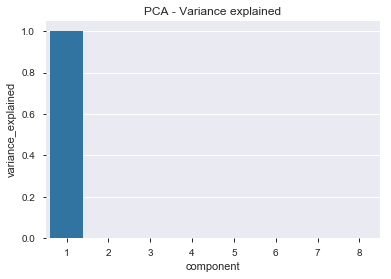

In [305]:
pca_variance_explained_df = pd.DataFrame({
    "component": np.arange(1, components+1),
    "variance_explained": pca.explained_variance_ratio_            
    })

ax = sns.barplot(x='component', y='variance_explained', data=pca_variance_explained_df)
ax.set_title("PCA - Variance explained")
plt.show()

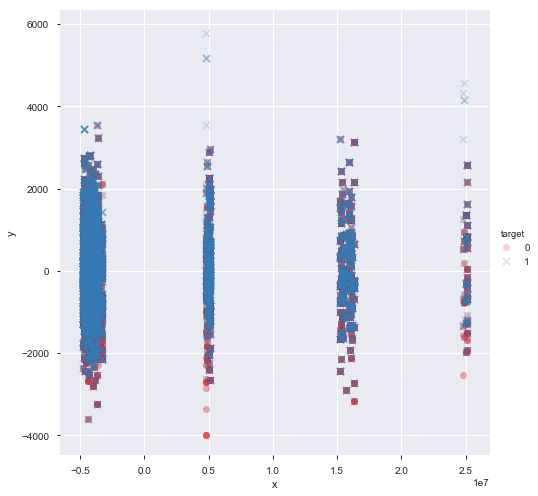

In [306]:
X_pca = pd.DataFrame(pca.transform(X)[:,:2])
X_pca['target'] = Y.values
X_pca.columns = ["x", "y", "target"]

sns.lmplot('x','y', 
           data=X_pca, 
           hue="target", 
           fit_reg=False, 
           markers=["o", "x"], 
           palette="Set1", 
           size=7,
           scatter_kws={"alpha": .2}
          )
plt.show()

# 4. Evaluate Algorithms¶

In [307]:
seed = 7
processors=1
num_folds=3
num_instances=len(X)
scoring='log_loss'
#kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)
kfold = KFold(n_splits=2, random_state=None, shuffle=False)

# Hyperparameter tuning
Logistic Regression

In [308]:
lr_grid = GridSearchCV(
    estimator = LogisticRegression(random_state=seed),
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 1, 10, 100, 1000]
    }, 
    cv = kfold, 
    #scoring = scoring, 
    n_jobs = processors)

lr_grid.fit(X, Y)

print(lr_grid.best_score_)
print(lr_grid.best_params_)

1.0
{'C': 0.01, 'penalty': 'l1'}


In [309]:
kobe_df.shape

(20386, 188)